## Read Files

In [1]:
import pandas as pd
import os

# Files to use for the analysis

# detected_bugs_file = os.path.join('detected_bugs_3.csv')
folder = os.path.join("results")

projects_ranking_file = os.path.join('jmh-projects-bigquery-fh-201702 - jmh-projects-gh.csv')

top = 25

projects = pd.read_csv(projects_ranking_file, sep=',')

# Normalize columns
projects['xml'] = projects['project'].apply(lambda x: x.split('/')[1] + '.xml')
projects['name'] = projects['project'].apply(lambda x: x.split('/')[1])


## Remove Projects that could not be analyzed

In [2]:
projects[projects.name == 'RxJava']

,project,forked,watchers,stars,forks,subscribers,xml,name
0,ReactiveX/RxJava,False,23558,23558,4143,1754,RxJava.xml,RxJava
209,benjchristensen/RxJava,True,4,4,3,10,RxJava.xml,RxJava
250,puniverse/RxJava,True,2,2,0,5,RxJava.xml,RxJava
273,akarnokd/RxJava,True,2,2,1,1,RxJava.xml,RxJava
374,abersnaze/RxJava,True,0,0,0,7,RxJava.xml,RxJava
479,jacek-rzrz/RxJava,True,0,0,0,1,RxJava.xml,RxJava
485,srvaroa/RxJava,True,0,0,0,1,RxJava.xml,RxJava
503,nurkiewicz/RxJava,True,0,0,0,1,RxJava.xml,RxJava
519,zsxwing/RxJava,True,0,0,0,1,RxJava.xml,RxJava
522,jbripley/RxJava,True,0,0,0,1,RxJava.xml,RxJava


In [2]:
# Remove projects that could not be analyzed
projects_to_remove = ['jgrapht/jgrapht', 'lemire/RoaringBitmap', 'RoaringBitmap/RoaringBitmap', 
                      'requery/requery', 'Netflix/feign', 'crate/crate', 'real-logic/simple-binary-encoding', 
                      'jbachorik/btrace', 'promeG/TinyPinyin', 'pcollections/pcollections', 'ktoso/sbt-jmh', 
                      'junkdog/artemis-odb', 'fakemongo/fongo', 'graalvm/truffle', 'graalvm/graal-core']

projects = projects[~projects['project'].isin(projects_to_remove)] # jgrapht

top_projects = projects.sort_values(by=['watchers', 'stars', 'forks'], ascending=False)

### Remove Forked Projects

In [3]:
non_duplicated_projects = top_projects[top_projects.forked == False]
print('Original Set containing %d projects' % len(top_projects))
print('Non-forked projects containing %d projects' % len(non_duplicated_projects))

Original Set containing 824 projects
Non-forked projects containing 506 projects


In [4]:
top_projects[top_projects.name == 'RxJava']

,project,forked,watchers,stars,forks,subscribers,xml,name
0,ReactiveX/RxJava,False,23558,23558,4143,1754,RxJava.xml,RxJava
209,benjchristensen/RxJava,True,4,4,3,10,RxJava.xml,RxJava
273,akarnokd/RxJava,True,2,2,1,1,RxJava.xml,RxJava
250,puniverse/RxJava,True,2,2,0,5,RxJava.xml,RxJava
374,abersnaze/RxJava,True,0,0,0,7,RxJava.xml,RxJava
479,jacek-rzrz/RxJava,True,0,0,0,1,RxJava.xml,RxJava
485,srvaroa/RxJava,True,0,0,0,1,RxJava.xml,RxJava
503,nurkiewicz/RxJava,True,0,0,0,1,RxJava.xml,RxJava
519,zsxwing/RxJava,True,0,0,0,1,RxJava.xml,RxJava
522,jbripley/RxJava,True,0,0,0,1,RxJava.xml,RxJava


## Analyze the bugs based on the Type reported

In [9]:
analyzed[analyzed['JMH_IGNORED_STATIC_METHOD_RETURN'] != 0]

,JMH_BENCHMARKMODE_SINGLESHOT,JMH_BENCHMARK_METHOD_FOUND,JMH_DEAD_STORE_VARIABLE,JMH_FIXTURE_USING_INVOCATION_SCOPE,JMH_IGNORED_METHOD_RETURN,JMH_IGNORED_STATIC_METHOD_RETURN,JMH_LOOP_INSIDE_BENCHMARK,JMH_NOTFORKED_BENCHMARK,JMH_STATE_FINAL_FIELD,JMH_STATE_FINAL_PRIMITIVE,JMH_UNSAFELOOP_INSIDE_BENCHMARK,JMH_UNSINKED_VARIABLE,forked,forks,project,stars,subscribers,watchers,xml
name,,,,,,,,,,,,,,,,,,,
netty,0.0,159.0,479.0,2.0,0.0,10.0,36.0,0.0,0.0,2.0,14.0,21.0,False,4775,netty/netty,9746,1243,9746,netty.xml
caffeine,0.0,38.0,302.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,3.0,False,192,ben-manes/caffeine,2414,176,2414,caffeine.xml
gs-collections,0.0,451.0,251.0,0.0,0.0,13.0,114.0,0.0,0.0,0.0,0.0,106.0,False,247,goldmansachs/gs-collections,1652,204,1652,gs-collections.xml
logging-log4j2,5.0,346.0,2724.0,0.0,0.0,5.0,11.0,0.0,0.0,4.0,6.0,19.0,False,194,apache/logging-log4j2,256,44,256,logging-log4j2.xml
glowroot,1.0,5.0,1406.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,False,43,glowroot/glowroot,184,27,184,glowroot.xml
geo,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,False,45,davidmoten/geo,182,27,182,geo.xml
reactive-streams-commons,0.0,157.0,54.0,0.0,0.0,2.0,9.0,0.0,0.0,0.0,0.0,4.0,False,14,reactor/reactive-streams-commons,106,32,106,reactive-streams-commons.xml
jbender,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,False,18,pinterest/jbender,95,17,95,jbender.xml
oopsla15-artifact,5.0,213.0,167.0,13.0,0.0,2.0,26.0,3.0,0.0,2.0,1.0,6.0,False,2,msteindorfer/oopsla15-artifact,16,1,16,oopsla15-artifact.xml


In [5]:
from collections import Counter
import xml.etree.ElementTree as ET

def analyzeBugTypes(df):
    
    try:
    
        tree = ET.parse(os.path.join(folder, df['xml']))
        root = tree.getroot()

        all_bugs = root.findall('BugInstance')

        bugs_per_type = [] 
        for b in all_bugs:
            bug_type = b.get('type')
            clazz = b.find('Class')
            if clazz and 'generated' not in clazz.get('classname'):
                bugs_per_type.append(bug_type)

        # Count bugs per type
        bugs = Counter(bugs_per_type)
        for key, value in bugs.items():
            df[key] = value
    
    except FileNotFoundError:
        pass
    
    return df

analyzed = non_duplicated_projects.apply(analyzeBugTypes, axis=1)
analyzed = analyzed.fillna(0)
analyzed = analyzed.set_index('name')
analyzed = analyzed[analyzed['JMH_BENCHMARK_METHOD_FOUND'] > 0]

## Generate Latex

In [7]:
columns_to_export = [
   'stars',
  # 'forks',
   # 'subscribers',
    'JMH_BENCHMARK_METHOD_FOUND',
    'JMH_FIXTURE_USING_INVOCATION_SCOPE',
#     'JMH_FIXTURE_USING_INVOCATION_SCOPE_rel',
    #'JMH_IGNORED_METHOD_RETURN',
#     'JMH_IGNORED_METHOD_RETURN_rel',
  #  'JMH_LOOP_INSIDE_BENCHMARK',
#     'JMH_LOOP_INSIDE_BENCHMARK_rel',
    #'JMH_STATE_FINAL_FIELD',
#     'JMH_STATE_FINAL_FIELD_rel',
    'JMH_NOTFORKED_BENCHMARK',
#     'JMH_NOTFORKED_BENCHMARK_rel',
    'JMH_BENCHMARKMODE_SINGLESHOT',
#     'JMH_BENCHMARKMODE_SINGLESHOT_rel'
    'JMH_UNSINKED_VARIABLE',
   # 'JMH_DEAD_STORE_VARIABLE',
    'JMH_IGNORED_STATIC_METHOD_RETURN',
    'JMH_STATE_FINAL_PRIMITIVE',
    'JMH_UNSAFELOOP_INSIDE_BENCHMARK',
    #'JMH_STATE_FINAL_STATIC_PRIMITIVE',
]


bug_type_dict = {
    'stars': 'Stars',
    'forks': 'Forks',
    'subscribers': 'Subs',
    'JMH_BENCHMARK_METHOD_FOUND': 'Benchs',
    'JMH_FIXTURE_USING_INVOCATION_SCOPE': 'INVO',
#     'JMH_FIXTURE_USING_INVOCATION_SCOPE_rel': 'INVO %',
    'JMH_IGNORED_METHOD_RETURN': 'RETU',
#     'JMH_IGNORED_METHOD_RETURN_rel': 'RETU %',
    'JMH_UNSAFELOOP_INSIDE_BENCHMARK': 'LOOP',
#     'JMH_LOOP_INSIDE_BENCHMARK_rel': 'LOOP %',
    'JMH_STATE_FINAL_FIELD': 'FINA',
#     'JMH_STATE_FINAL_FIELD_rel': 'FINA %',
    'JMH_NOTFORKED_BENCHMARK': 'FORK',
#     'JMH_NOTFORKED_BENCHMARK_rel': 'FORK %',
    'JMH_BENCHMARKMODE_SINGLESHOT': 'SING',
#     'JMH_BENCHMARKMODE_SINGLESHOT_rel': 'SING %'
    'JMH_UNSINKED_VARIABLE': 'UNSINK',
 #   'JMH_DEAD_STORE_VARIABLE': 'DEAD',
    'JMH_IGNORED_STATIC_METHOD_RETURN': 'STAT',
    'JMH_STATE_FINAL_PRIMITIVE': 'FINA',
    
}

analyzed = analyzed[columns_to_export]

analyzed = analyzed.rename(columns=bug_type_dict)
latex = analyzed[:top]
latex = latex.fillna('')
latex = latex.replace({0: ''})

print(latex.to_latex())

\begin{tabular}{lrllllllll}
\toprule
{} &  Stars & Benchs & INVO & FORK & SING & UNSINK & STAT & FINA & LOOP \\
name                     &        &        &      &      &      &        &      &      &      \\
\midrule
RxJava                   &  23558 &    215 &      &      &      &        &      &      &      \\
netty                    &   9746 &    159 &    2 &      &      &     21 &   10 &    2 &   14 \\
zipkin                   &   5627 &     74 &      &      &      &      1 &      &      &      \\
druid                    &   4743 &    148 &    2 &      &      &     86 &      &    1 &   11 \\
okio                     &   3703 &     19 &    1 &      &      &        &      &      &      \\
grpc-java                &   2631 &      3 &      &      &      &      1 &      &      &      \\
caffeine                 &   2414 &     38 &      &      &      &      3 &    1 &      &      \\
h2o-3                    &   1943 &     18 &   10 &      &      &      1 &      &      &    6 \\
gs-col

In [8]:
anti_patterns = ['INVO', 'FORK', 'SING', 'UNSINK', 'STAT', 'FINA', 'LOOP']

def anti_pattern_category_analysis(df):
    cat = 0
    count = 0
    for ap in anti_patterns:
        if df[ap] > 0:
            cat = cat + 1
            count = count + df[ap]
    df['# of AP'] = count
    df['# of Categories'] = cat
    return df
    
df = analyzed.apply(anti_pattern_category_analysis, axis=1)
print('Analyzed Projects containing %d' % len(df))

Analyzed Projects containing 133


### Zero Anti-Patterns Found

### Project Distribution Analysis

Anti-patterns category distribution across different projects.

In [13]:
counts = df['# of Categories'].value_counts()

#counts['% of Projects'] = counts / 248 * 100
print(counts.to_latex())

\begin{tabular}{lr}
\toprule
{} &  \# of Categories \\
\midrule
0 &               64 \\
1 &               39 \\
2 &               14 \\
3 &               10 \\
5 &                3 \\
4 &                2 \\
7 &                1 \\
\bottomrule
\end{tabular}



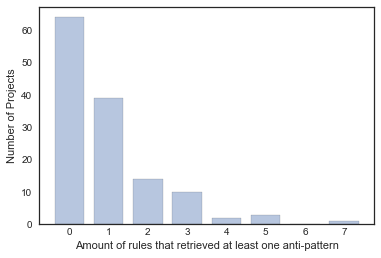

In [82]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set(font_scale=1)
sns.set_style("white")

ax = sns.distplot(df['# of Categories'], kde=False, bins=range(0,9),
             hist_kws={'edgecolor':'black', 'rwidth':0.75, 'alpha':.4})

ax.set(xlabel='Amount of rules that retrieved at least one anti-pattern', ylabel='Number of Projects',)

# Hide major tick labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())

# Centralize minor tick labels
ax.xaxis.set_minor_locator(ticker.FixedLocator([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['0','1','2','3','4','5','6','7', '']))

plt.savefig(os.path.join(folder, '..', 'figs', 'projects-rules-ditribution.pdf'))

In [91]:
ap = df['# of AP'].value_counts()

ap.sort_index()

0.0      64
1.0      15
2.0      10
3.0       6
4.0       6
5.0       4
6.0       3
9.0       3
10.0      1
11.0      1
12.0      1
13.0      1
17.0      1
19.0      1
20.0      1
23.0      1
27.0      1
29.0      1
32.0      2
33.0      4
39.0      1
49.0      2
75.0      1
100.0     1
119.0     1
Name: # of AP, dtype: int64

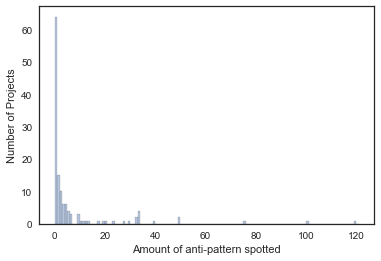

In [83]:
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")

ax = sns.distplot(df['# of AP'], kde=False, hist=True, bins=range(0,122),
             hist_kws={'edgecolor':'black', 'alpha':.4})

ax.set(xlabel='Amount of anti-pattern spotted', ylabel='Number of Projects',)

plt.savefig(os.path.join(folder, '..', 'figs', 'projects-ap-ditribution.pdf'))


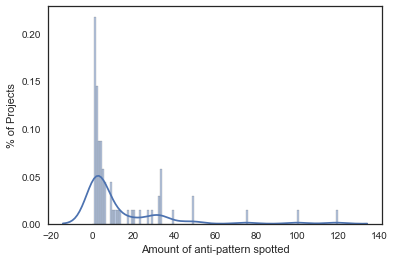

In [59]:
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")

p = df[df['# of AP'] > 0]

ax = sns.distplot(p['# of AP'], kde=True, bins=range(0,122),
             hist_kws={'edgecolor':'black', 'alpha':.4})

#plt.xlim([1,120])

ax.set(xlabel='Amount of anti-pattern spotted', ylabel='% of Projects',)

plt.savefig(os.path.join(folder, '..', 'figs', 'projects-ap-ditribution-2.pdf'))

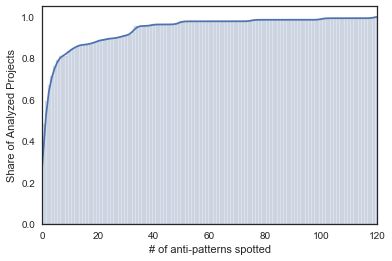

In [84]:
%matplotlib inline

ax = sns.distplot(df['# of AP'], kde=True, bins=range(0,122),
             hist_kws={'edgecolor':'black', 'alpha':.2, 'cumulative':True},
             kde_kws={'cumulative': True})

plt.xlim([0,120])
ax.set(xlabel='# of anti-patterns spotted', ylabel='Share of Analyzed Projects',)

plt.savefig(os.path.join(folder, '..', 'figs', 'projects-ap-ditribution-cum.pdf'))

### Analysis per Category of Anti-pattern

In [92]:
category_df = pd.DataFrame(columns=['Total', '# of Projects'])

pd.options.display.float_format = '{:.2f}'.format

for ap in anti_patterns:
    total = df[ap].sum()
    projects = len(df[df[ap] > 0])
    category_df.loc[ap] = [total, projects]
    
category_df['% of Projects'] = category_df['# of Projects'] / len(df) * 100

    
print(category_df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Total &  \# of Projects &  \% of Projects \\
\midrule
INVO   &  84.00 &          11.00 &           8.27 \\
FORK   &   7.00 &           3.00 &           2.26 \\
SING   &  55.00 &          11.00 &           8.27 \\
UNSINK & 516.00 &          57.00 &          42.86 \\
STAT   &  53.00 &          12.00 &           9.02 \\
FINA   &  42.00 &          13.00 &           9.77 \\
LOOP   & 193.00 &          20.00 &          15.04 \\
\bottomrule
\end{tabular}



In [102]:
project_selection = pd.DataFrame()

for ap in anti_patterns:
    print(ap)
    print(df[df[ap] > 0][:5])
    print()
    


INVO
          Stars  Benchs  INVO  FORK  SING  UNSINK  STAT  FINA  LOOP  # of AP  \
name                                                                           
netty   9746.00  159.00  2.00  0.00  0.00   21.00 10.00  2.00 14.00    49.00   
druid   4743.00  148.00  2.00  0.00  0.00   86.00  0.00  1.00 11.00   100.00   
okio    3703.00   19.00  1.00  0.00  0.00    0.00  0.00  0.00  0.00     1.00   
h2o-3   1943.00   18.00 10.00  0.00  0.00    1.00  0.00  0.00  6.00    17.00   
JCTools 1053.00   92.00  2.00  0.00  0.00   26.00  0.00  0.00  1.00    29.00   

         # of Categories  
name                      
netty                  5  
druid                  4  
okio                   1  
h2o-3                  3  
JCTools                3  

FORK
                     Stars  Benchs  INVO  FORK  SING  UNSINK  STAT  FINA  \
name                                                                       
pgjdbc              322.00   35.00  0.00  2.00  1.00   10.00  0.00  0.00   
oopsla15-ar

### Selected Projects

In [135]:
selected_projects = [
    'netty',
    'druid',
    'h2o-3',
    'pgdbc',
    'oopsla15-artifact',
    'benchmark-arraycopy',
    'logging-log4j2',
    'caffeine',
    'gs-collections',
    'hppc'
]

to_export

df_selected = analyzed[analyzed.index.isin(selected_projects)]
pd.options.display.float_format = '{:2.0f}'.format
df_selected = df_selected[anti_patterns].apply(pd.to_numeric)


print(df_selected[anti_patterns].to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  INVO &  FORK &  SING &  UNSINK &  STAT &  FINA &  LOOP \\
name                &       &       &       &         &       &       &       \\
\midrule
netty               &     2 &     0 &     0 &      21 &    10 &     2 &    14 \\
druid               &     2 &     0 &     0 &      86 &     0 &     1 &    11 \\
caffeine            &     0 &     0 &     0 &       3 &     1 &     0 &     0 \\
h2o-3               &    10 &     0 &     0 &       1 &     0 &     0 &     6 \\
gs-collections      &     0 &     0 &     0 &     106 &    13 &     0 &     0 \\
hppc                &     0 &     0 &     3 &       0 &     0 &     0 &     0 \\
logging-log4j2      &     0 &     0 &     5 &      19 &     5 &     4 &     6 \\
oopsla15-artifact   &    13 &     3 &     5 &       6 &     2 &     2 &     1 \\
netty               &     2 &     0 &     0 &      21 &    10 &     2 &    14 \\
benchmark-arraycopy &     0 &     2 &     0 &       2 &     0 &     0 &     0 \\
\

In [165]:
selected = pd.DataFrame(columns=['#1', '#2', '#3'])

for ap in anti_patterns: 
    
    p = analyzed[analyzed[ap] > 1] # Filter unique cases
    
    selected.loc[ap] = p[:3].index.values
        
    
    
print(selected.to_latex())

\begin{tabular}{llll}
\toprule
{} &      \#1 &                 \#2 &                   \#3 \\
\midrule
INVO   &   netty &              druid &                h2o-3 \\
FORK   &  pgjdbc &  oopsla15-artifact &  benchmark-arraycopy \\
SING   &    hppc &     logging-log4j2 &                xodus \\
UNSINK &   netty &              druid &             caffeine \\
STAT   &   netty &     gs-collections &       logging-log4j2 \\
FINA   &   netty &     logging-log4j2 &          jmh-samples \\
LOOP   &   netty &              druid &                h2o-3 \\
\bottomrule
\end{tabular}

